# 实验2：房屋价格预测
**实验目的**：
1. 掌握数据探索性分析（EDA）的基本方法。
2. 掌握多元线性回归模型的构建、评估与应用。
3. 熟悉 Python 数据分析与挖掘常用库的使用。

**实验内容**：
利用房屋价格数据集，进行数据清洗、可视化分析，并构建多元线性回归模型预测房价。

## 1. 导入必要的库

In [35]:
import numpy as np

In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. 读取数据
读取房屋价格数据集，并查看数据的前几行、形状和基本信息。

In [43]:
df = pd.read_csv('./house_price_regression_dataset.csv')

In [44]:
df.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06

In [45]:
df.shape

(1000, 8)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


## 3. 数据的探索性分析
通过统计描述和可视化手段，了解数据的分布特征及变量间的关系。

### 3.1 数据统计描述

In [47]:
df.describe()   # 数值型变量的统计描述

Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e+05  
25%       0.000000              3.000000  4.016482e+05  
50%       1.000000              6.000000  6.282673e+05  
75%       2.000000              8.000000  8.271413e+05  
max       2.000000             10.000000  1.108237e+06

### 3.2 数据可视化

In [48]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 3.2.1 单变量分布分析

**数值型变量示例：房屋价格 (House_Price)**

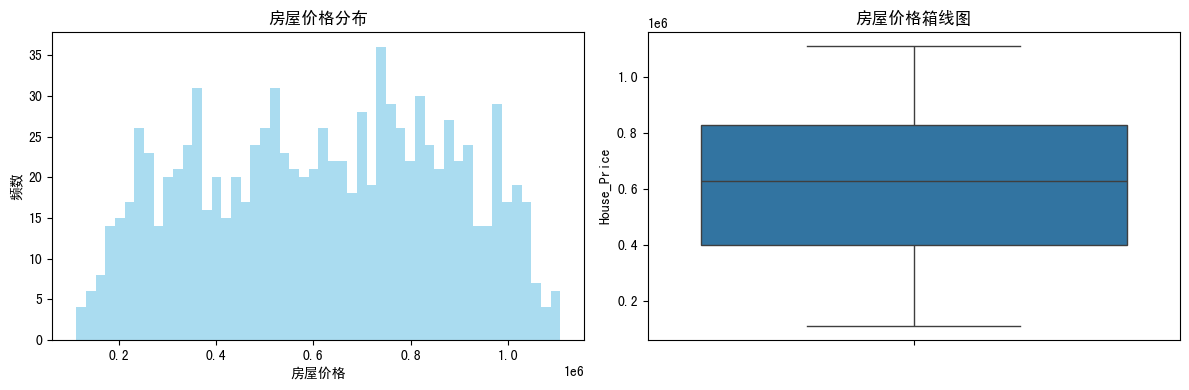

In [49]:
# 目标变量House_Price分布
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['House_Price'], bins = 50, alpha = 0.7, color = 'skyblue')
plt.xlabel('房屋价格')
plt.ylabel('频数')
plt.title('房屋价格分布')

plt.subplot(1, 2, 2)
sns.boxplot(y = df['House_Price'])
plt.title('房屋价格箱线图')

plt.tight_layout()
plt.savefig('./tmp/House_Price_hist_box.png')
plt.show()

In [50]:
df['House_Age'] = 2025 - df['Year_Built']  # 假设当前年份为2025

**离散型变量示例：卧室数量 (Num_Bedrooms)**

In [51]:
# 计算卧室数量分布
bedroom_counts = df['Num_Bedrooms'].value_counts().sort_index()

In [52]:
bedroom_counts

Num_Bedrooms
1    201
2    215
3    182
4    197
5    205
Name: count, dtype: int64

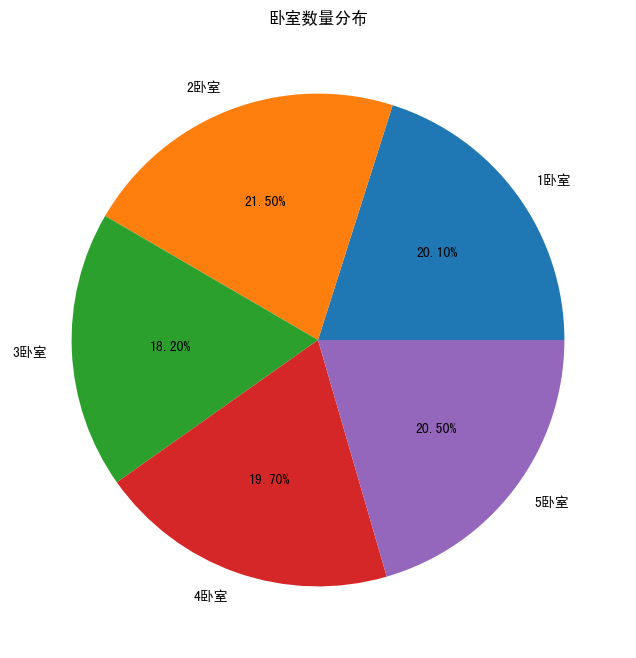

In [53]:
# 绘制饼图
plt.figure(figsize = (8, 8))
plt.pie(bedroom_counts.values, labels = [f'{beds}卧室' for beds in bedroom_counts.index], autopct = '%1.2f%%')
plt.title('卧室数量分布')
plt.savefig('./tmp/Num_Bedrooms_pie.png')
plt.show()

#### 3.2.2 变量间关系分析

**数值型变量与目标变量的关系示例：房屋面积 vs 房价**

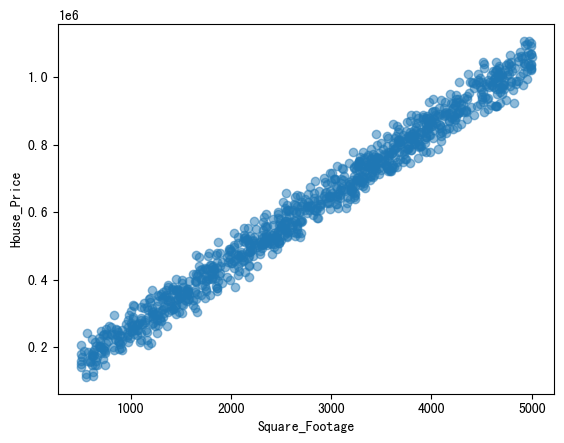

In [54]:
plt.scatter(df['Square_Footage'], df['House_Price'], alpha = 0.5)       #绘制散点图
plt.xlabel('Square_Footage')
plt.ylabel('House_Price')
plt.savefig('./tmp/Square_Footage_scatter1.png')
plt.show()

**离散型变量与目标变量的关系示例：卧室数量 vs 房价**

<Figure size 1000x600 with 0 Axes>

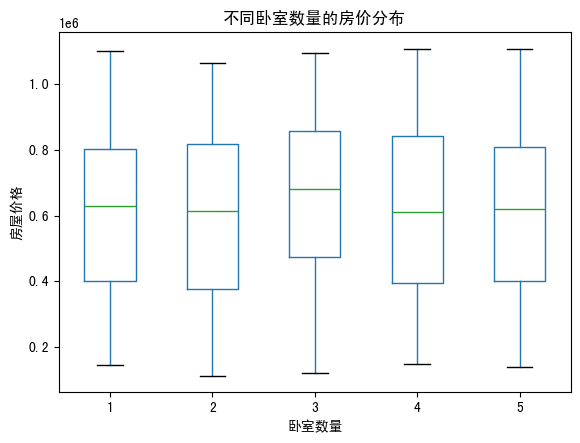

In [55]:
plt.figure(figsize = (10, 6))
df.boxplot(column = 'House_Price', by = 'Num_Bedrooms', grid = False)
plt.xlabel('卧室数量')
plt.ylabel('房屋价格')
plt.title('不同卧室数量的房价分布')
plt.suptitle('')  # 移除自动标题
plt.savefig('./tmp/Num_Bedrooms_House_Price_boxplot.png')
plt.show()

### 3.3 相关性分析

In [56]:
df = df.drop(columns = 'Year_Built')

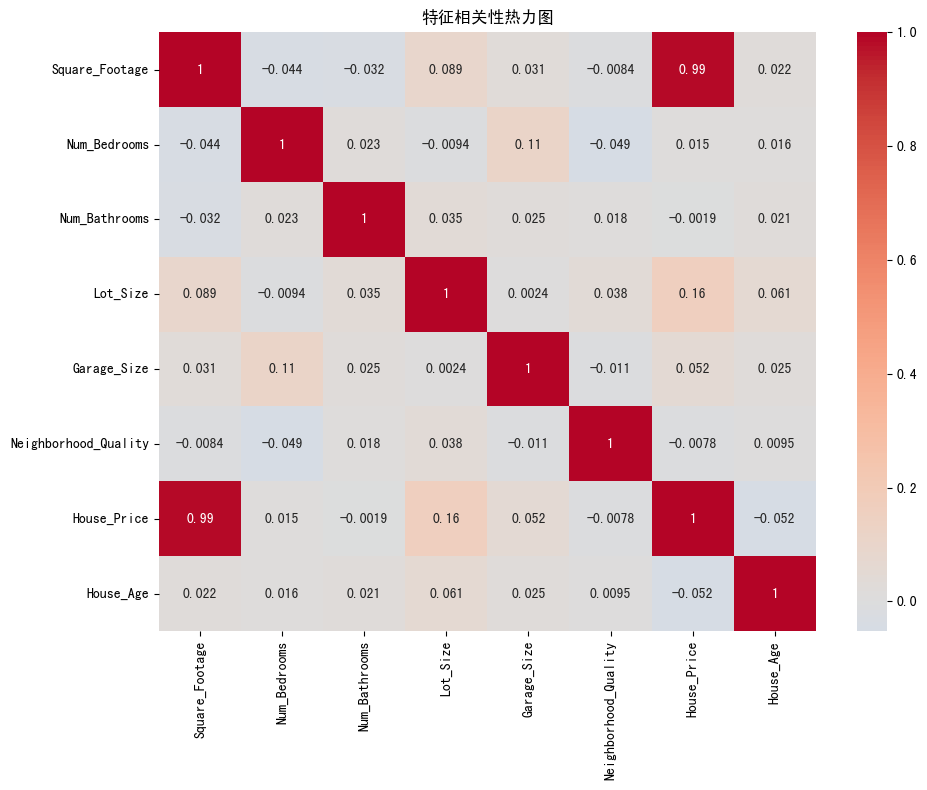

In [57]:
# 相关性热力图
plt.figure(figsize = (10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('特征相关性热力图')
plt.tight_layout()
plt.savefig('./tmp/corr_heatmap.png')
plt.show()

## 4. 数据预处理
对数据进行必要的处理，如删除无关特征、缺失值处理（本数据集无缺失值）、特征编码等。

## 5. 多元线性回归模型
构建多元线性回归模型，预测房屋价格。

### 5.1 提取特征变量和目标变量

In [58]:
X = df.drop(columns = 'House_Price')

In [59]:
y = df['House_Price']

### 5.2 数据标准化

In [60]:
scaler = StandardScaler()

In [61]:
X_scaled = scaler.fit_transform(X)  # 拟合并转换数据

### 5.3 划分训练集和测试集

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 123)

### 5.4 模型构建与训练

In [63]:
lr_model = LinearRegression()

In [64]:
lr_model.fit(X_train, y_train)

LinearRegression()

### 5.5 模型预测及评估

In [65]:
y_pred = lr_model.predict(X_test)

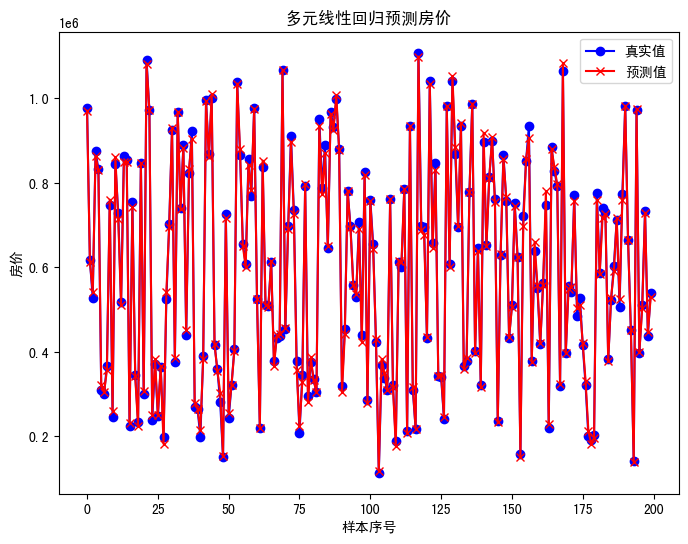

In [66]:
plt.figure(figsize = (8,6))
plt.plot(range(len(y_test)), y_test.values, label = '真实值', color = 'blue', marker = 'o')
plt.plot(range(len(y_pred)), y_pred, label = '预测值', color = 'red', marker = 'x')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.title('多元线性回归预测房价')
plt.legend()
plt.savefig('./tmp/predict.png')
plt.show()

In [67]:
mae = mean_absolute_error(y_test, y_pred)

In [68]:
print(f"平均绝对误差 (MAE): ${mae:,.2f}")

平均绝对误差 (MAE): $8,074.49


In [69]:
mse = mean_squared_error(y_test, y_pred)

In [70]:
print(f"均方误差 (MSE): ${mse:,.2f}")

均方误差 (MSE): $103,750,353.01


In [71]:
rmse = np.sqrt(mse)

In [72]:
print(f"均方根误差 (RMSE): ${rmse:,.2f}")

均方根误差 (RMSE): $10,185.79


In [73]:
percentage_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [74]:
print(f"平均百分比误差: {percentage_error:.2f}%")

平均百分比误差: 1.71%


In [75]:
r2 = r2_score(y_test, y_pred)

In [76]:
print(f"R² 得分: {r2:.4f}")

R² 得分: 0.9985


### 5.6 特征重要性评估

In [77]:
features = X.columns   # 特征变量名

In [78]:
importances = np.abs(lr_model.coef_)   # 特征变量的重要性程度

In [79]:
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending = False)   # 进行降序排序

特征名称          特征重要性
0        Square_Footage  250490.305678
6             House_Age   20295.478542
3              Lot_Size   19368.059608
1          Num_Bedrooms   14603.144194
2         Num_Bathrooms    6719.442885
4           Garage_Size    4022.730792
5  Neighborhood_Quality     137.170150

In [80]:
Impt_Series = pd.Series(importances, index = features)   # 构建含序列用于绘图

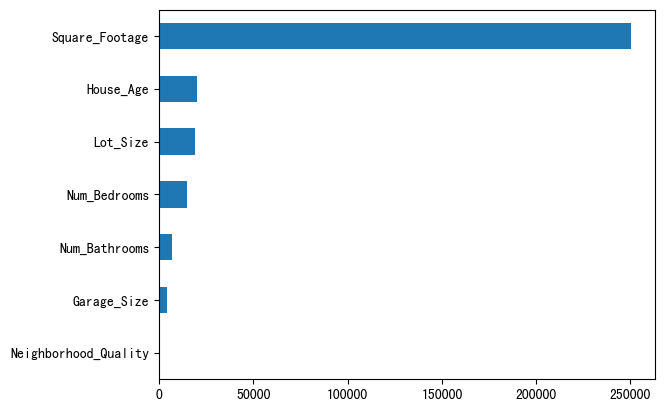

In [81]:
Impt_Series.sort_values(ascending = True).plot(kind = 'barh')   # 对序列排序绘图
plt.savefig('./tmp/importances.png')
plt.show()